In [38]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.activations import relu, softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.src.preprocessing.image import DirectoryIterator
from keras.src.callbacks import History
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [18]:
DATASET_PATH: str = '/content/drive/MyDrive/datasets/17Flowers/train'
INPUT_SHAPE: tuple[int, int, int] = (244, 244, 3)
EPOCHS: int = 35
MODEL_PATH_TO_SAVE: str = f'/content/drive/MyDrive/17_flowers_classification_{EPOCHS}ep.kears'

## Without Augmentation

In [19]:
idg = ImageDataGenerator(validation_split=.1)

In [20]:
train_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    subset='training',
)

validation_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    subset='validation',
)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [21]:
model = Sequential([
    Conv2D(32, 3, activation=relu, input_shape=INPUT_SHAPE , strides=2, padding='same'),
    MaxPooling2D(),

    Conv2D(64, 3, activation=relu , strides=2,  padding='same'),
    MaxPooling2D(),


    Flatten(),

    Dropout(.2),
    Dense(128, activation=relu),
    Dense(17, activation=softmax),
])

In [22]:
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)


history: History = model.fit(
    train_dataset, validation_data=validation_dataset,
    epochs=EPOCHS
)

Epoch 1/35
29/29 [==============================] - 6s 148ms/step - loss: 49.8390 - accuracy: 0.0876 - val_loss: 2.7905 - val_accuracy: 0.1158
Epoch 2/35
29/29 [==============================] - 5s 163ms/step - loss: 2.5744 - accuracy: 0.2162 - val_loss: 2.4788 - val_accuracy: 0.2211
Epoch 3/35
29/29 [==============================] - 5s 178ms/step - loss: 1.6619 - accuracy: 0.5243 - val_loss: 2.4849 - val_accuracy: 0.2842
Epoch 4/35
29/29 [==============================] - 4s 155ms/step - loss: 0.9929 - accuracy: 0.7157 - val_loss: 3.0205 - val_accuracy: 0.2105
Epoch 5/35
29/29 [==============================] - 5s 166ms/step - loss: 0.5346 - accuracy: 0.8595 - val_loss: 2.9026 - val_accuracy: 0.3579
Epoch 6/35
29/29 [==============================] - 5s 174ms/step - loss: 0.2922 - accuracy: 0.9146 - val_loss: 3.9575 - val_accuracy: 0.3053
Epoch 7/35
29/29 [==============================] - 4s 146ms/step - loss: 0.2685 - accuracy: 0.9416 - val_loss: 3.7035 - val_accuracy: 0.2842
Epoch

## With Augmentation

In [23]:
del idg, train_dataset, validation_dataset
idg = ImageDataGenerator(
    rotation_range=10,
    zoom_range=.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=.1
)

In [24]:
train_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    subset='training'
)

validation_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    subset='validation'
)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [25]:
model = Sequential([
    Conv2D(32, 3, activation=relu, input_shape=INPUT_SHAPE , strides=2, padding='same'),
    MaxPooling2D(),

    Conv2D(64, 3, activation=relu , strides=2,  padding='same'),
    MaxPooling2D(),


    Flatten(),

    Dropout(.2),
    Dense(128, activation=relu),
    Dense(17, activation=softmax),
])

In [26]:
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

history: History = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

Epoch 1/35
29/29 [==============================] - 20s 630ms/step - loss: 2.5686 - accuracy: 0.1514 - val_loss: 2.0337 - val_accuracy: 0.2947
Epoch 2/35
29/29 [==============================] - 20s 698ms/step - loss: 1.8816 - accuracy: 0.3784 - val_loss: 1.4638 - val_accuracy: 0.5263
Epoch 3/35
29/29 [==============================] - 19s 666ms/step - loss: 1.4761 - accuracy: 0.5168 - val_loss: 1.2621 - val_accuracy: 0.6105
Epoch 4/35
29/29 [==============================] - 18s 622ms/step - loss: 1.2100 - accuracy: 0.5805 - val_loss: 1.2276 - val_accuracy: 0.5368
Epoch 5/35
29/29 [==============================] - 18s 622ms/step - loss: 1.0632 - accuracy: 0.6432 - val_loss: 1.0100 - val_accuracy: 0.6316
Epoch 6/35
29/29 [==============================] - 18s 622ms/step - loss: 0.9469 - accuracy: 0.6519 - val_loss: 0.8982 - val_accuracy: 0.6842
Epoch 7/35
29/29 [==============================] - 19s 645ms/step - loss: 0.8460 - accuracy: 0.7038 - val_loss: 1.0015 - val_accuracy: 0.6526

In [27]:
model.save(MODEL_PATH_TO_SAVE)

## Plot the confusion matrix

1/1 [==============================] - 0s 18ms/step
breaked
breaked
1/1 [==============================] - 0s 18ms/step
breaked
breaked
1/1 [==============================] - 0s 18ms/step
breaked
breaked
1/1 [==============================] - 0s 26ms/step
breaked
breaked
1/1 [==============================] - 0s 18ms/step
breaked
breaked
1/1 [==============================] - 0s 17ms/step
breaked
breaked
1/1 [==============================] - 0s 18ms/step
breaked
breaked
1/1 [==============================] - 0s 17ms/step
breaked
breaked
1/1 [==============================] - 0s 27ms/step
breaked
breaked
1/1 [==============================] - 0s 17ms/step
breaked
breaked
1/1 [==============================] - 0s 16ms/step
breaked
breaked
1/1 [==============================] - 0s 19ms/step
breaked
breaked
1/1 [==============================] - 0s 17ms/step
breaked
breaked
1/1 [==============================] - 0s 29ms/step
breaked
breaked
1/1 [==============================] - 0s 28ms/s

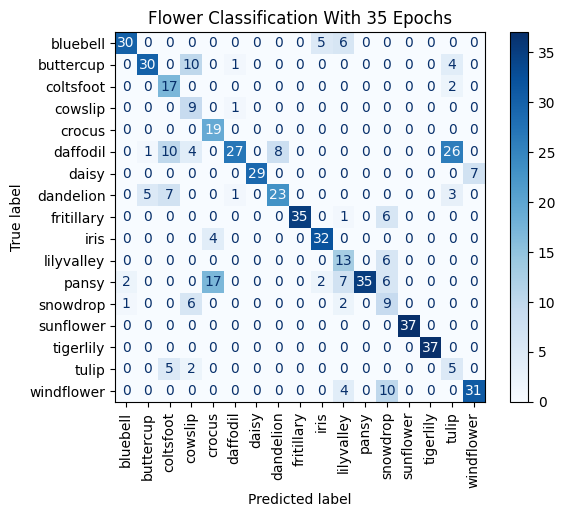

In [48]:
Y_true = []
Y_pred = []

img_counter, lbl_counter = 0, 0
main_counter = 0

for images, labels in validation_dataset:
    for image in images:
        image = np.expand_dims(image, axis=0)
        prediction = model.predict(image)
        Y_true.append(np.argmax(prediction))
        img_counter += 1
        if img_counter >= 30:
          print('breaked')
          break

    img_counter = 0

    for label in labels:
        Y_pred.append(np.argmax(label))
        lbl_counter += 1
        if lbl_counter >= 30:
          print('breaked')
          break
    lbl_counter = 0

    main_counter += 1
    if main_counter >= 20:
      break

flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
          'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=flowers)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title(f'Flower Classification With {EPOCHS} Epochs')
plt.show()

# Telegram Bot

In [ ]:
!pip install telebot

In [50]:
import telebot
from telebot.types import Message
from keras.models import Sequential, load_model
import numpy as np
import cv2 as cv

In [53]:
flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
          'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
model: Sequential = load_model(MODEL_PATH_TO_SAVE)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 122, 122, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 14400)             0         
                                                                 
 dropout_3 (Dropout)         (None, 14400)            

In [72]:
bot = telebot.TeleBot('6838085244:AAFH3iMH2MlrmjycKmy_yZpR7iZ-FhPDJ2I', parse_mode=None)
IS_IMG: bool = False


@bot.message_handler(commands=['start'])
def send_welcome(message: Message):
    bot.reply_to(
        message, f'سلام {message.from_user.first_name} خوبی؟')
    bot.send_message(
        message.chat.id, 'من ربات متنیم. و برای این تمرین داده شدم که ۱۷ تا گل رو از هم تشخیص بدم')


@bot.message_handler(commands=['help'])
def send_help(message: Message):
    bot.send_message(message.chat.id, 'فقط کافیه یک عکس از یک گل برام بفرستی')


@bot.message_handler(commands=['image'])
def get_img(message: Message):
    global IS_IMG
    IS_IMG = True
    bot.send_message(message.chat.id, 'یک عکس از یک گل بفرست')
enumerate

@bot.message_handler(content_types=["photo"])
def photo(message: Message):
    global IS_IMG, model
    if IS_IMG:
        info = bot.get_file(
            message.photo[len(message.photo) - 1].file_id
        )
        user_img = bot.download_file(info.file_path)
        with open('user_flower.jpg', 'wb') as file:
            file.write(user_img)

        user_image = cv.imread('user_flower.jpg')
        user_image = cv.resize(user_image, INPUT_SHAPE[:2])
        # user_image = np.expand_dims(user_image, axis=0)

        prediction = np.argmax(model.predict(np.expand_dims(user_image, axis=0)))

        bot.send_message(
            message.chat.id, f'اسم گلت: {flowers[prediction]}'
        )
        IS_IMG = False

bot.infinity_polling()

1/1 [==============================] - 0s 19ms/step


2024-01-11 18:26:08,188 (__init__.py:968 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
ERROR:TeleBot:Infinity polling: polling exited
2024-01-11 18:26:08,192 (__init__.py:970 MainThread) ERROR - TeleBot: "Break infinity polling"
ERROR:TeleBot:Break infinity polling


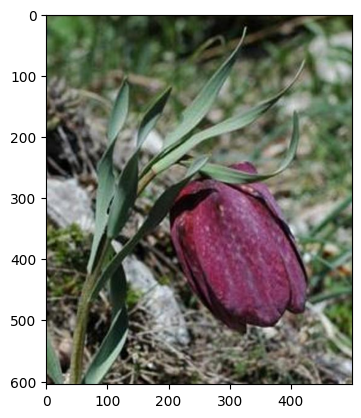

In [82]:
# test_img = cv.imread('/content/user_flower.jpg')
test_img = cv.imread('/content/drive/MyDrive/datasets/17Flowers/train/fritillary/image_0649.jpg')
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))

In [83]:
test_img = cv.resize(test_img, (244, 244))

In [88]:
flowers[np.argmax(model.predict(np.expand_dims(test_img, axis=0)))]

1/1 [==============================] - 0s 19ms/step


'iris'